<a href="https://colab.research.google.com/github/Mparate1234/Py_stat_DS_ML/blob/main/k-fold%20cv%2Cgrid%20search%2Cmodel%20evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Evaluation & Hyperparameter Tuning Demo 1: Perform K-Fold Cross Validation Using Python 
In this demo, you will learn how to apply K-Fold cross validation to evaluate the model 
using Python.
# Problem Statement
Details of clients of a wholesale distributor is given along with their region the aim is to 
classify their region

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data=pd.read_csv('/content/drive/MyDrive/Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
pd.DataFrame({'Count':data.isnull().sum(),'Percentage':data.isnull().sum()/data.shape[0]})

,Count,Percentage
Channel,0,0.0
Region,0,0.0
Fresh,0,0.0
Milk,0,0.0
Grocery,0,0.0
Frozen,0,0.0
Detergents_Paper,0,0.0
Delicassen,0,0.0


In [6]:
target_ratio=pd.DataFrame({'Counts':data.Region.value_counts(),'Percentage':data.Region.value_counts()/len(data)})
target_ratio

,Counts,Percentage
3,316,0.718182
1,77,0.175000
2,47,0.106818


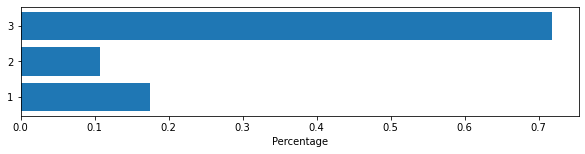

In [7]:
plt.figure(figsize = (10,2))
plt.barh(target_ratio.index,target_ratio.Percentage)
plt.xlabel('Percentage')
plt.show()

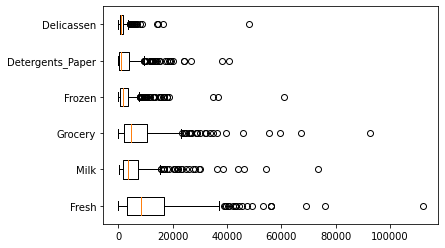

In [8]:
data = pd.get_dummies(data, columns=['Channel'])
feat = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
plt.boxplot(data.loc[:, feat], labels=feat, vert=False)
plt.show()



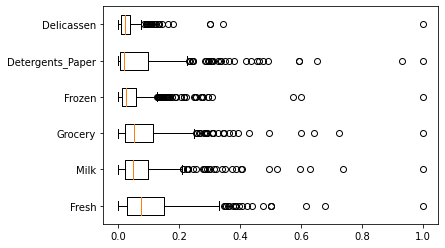

In [9]:
data[feat]=MinMaxScaler().fit_transform(data[feat])
plt.boxplot(data[feat],labels=feat,vert=False)
plt.show()


In [10]:
data.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2
0,3,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847,0,1
1,3,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984,0,1
2,3,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559,0,1
3,3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234,1,0
4,3,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093,0,1


In [11]:
X=data.drop(['Region'],axis=1)
y=data.Region

# K-Fold Cross Validator

In [12]:
kf=KFold(n_splits=4)
kf.get_n_splits(X,y)
clf=DecisionTreeClassifier()
for train_ind, test_ind in kf.split(X,y):
    clf.fit(X.iloc[train_ind,:],y[train_ind])
    pred=clf.predict(X.iloc[test_ind,:])
    print(round(accuracy_score(y[test_ind],pred),3))


0.627
0.591
0.245
0.655


# Cross Validator
Following parameter are avaliable in Cross Validator:
• estimator:model The model to use to fit the data.
• X: array-like
• y:target variable optional
• cv:intIf None then uses 5-fold CV, on using an int value uses stratified 
KFold(Preserves percentage of samples of each class

In [13]:
cv =cross_val_score(DecisionTreeClassifier(),X,y,cv=4,scoring='accuracy')
cv

array([0.59090909, 0.50909091, 0.53636364, 0.52727273])

# Model Evaluation & Hyperparameter Tuning Demo 2: Model Evaluation Metrics for Regression 
In this demo, you will learn how to use different model evaluation metrics like MAPE, 
RMSE, RMSLE for regression model.
# Problem Statement
The dataset has various features from coffee beans from different countries. The aim is to 
predict mean altitude.

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,mean_squared_log_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [15]:
data=pd.read_csv('/content/drive/MyDrive/arabica_data.csv')
data.head()


,Country.of.Origin,Number.of.Bags,Bag.Weight,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,altitude_mean_meters
0,Ethiopia,300,60,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,90.58,0.12,2075.0
1,Ethiopia,300,60,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,89.92,0.12,2075.0
2,Guatemala,5,1,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,89.75,0.00,1700.0
3,Ethiopia,320,60,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,89.00,0.11,2000.0
4,Ethiopia,300,60,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,88.83,0.12,2075.0


In [16]:
data.shape

(1311, 16)

In [17]:
pd.DataFrame({'Count':data.isnull().sum(),'Percentage':data.isnull().sum()/data.shape[0]})

,Count,Percentage
Country.of.Origin,1,0.000763
Number.of.Bags,0,0.000000
Bag.Weight,0,0.000000
Aroma,0,0.000000
Flavor,0,0.000000
Aftertaste,0,0.000000
Acidity,0,0.000000
Body,0,0.000000
Balance,0,0.000000
Uniformity,0,0.000000


In [18]:
data[data['Country.of.Origin'].isna()==True]

,Country.of.Origin,Number.of.Bags,Bag.Weight,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,altitude_mean_meters
1197,NaN,149,70,6.75,6.75,6.42,6.83,7.58,7.5,10.0,10.0,10.0,7.25,79.08,0.1,NaN


In [19]:
data=data.drop(1197,axis=0)


In [20]:
mean=data.altitude_mean_meters.mean()
data.altitude_mean_meters=data.altitude_mean_meters.fillna(mean)
pd.DataFrame({'Count':data.isnull().sum(),'Percentage':data.isnull().sum()/data.shape[0]})


,Count,Percentage
Country.of.Origin,0,0.0
Number.of.Bags,0,0.0
Bag.Weight,0,0.0
Aroma,0,0.0
Flavor,0,0.0
Aftertaste,0,0.0
Acidity,0,0.0
Body,0,0.0
Balance,0,0.0
Uniformity,0,0.0


In [21]:
print(*data.columns,sep=',')


Country.of.Origin,Number.of.Bags,Bag.Weight,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,altitude_mean_meters


In [22]:
X=data[['Aroma','Flavor','Aftertaste','Acidity','Body','Balance','Uniformity','Clean.Cup','Sweetness','Cupper.Points','Total.Cup.Points','Moisture']]
y=data.altitude_mean_meters
X_train, X_test, y_train,y_test=train_test_split(X,y,random_state=2,test_size=0.3)


In [23]:
lreg=LinearRegression()
lreg.fit(X_train,y_train)
lpred=lreg.predict(X_test)

In [24]:
#MAPE
mape= np.mean(np.abs((np.array(y_test) - np.array(lpred)) / y_test)) *100
print(mape)

1839.5565935584266


In [25]:
# MSE
mean_squared_error(y_test,lpred)

1679073.419874545

In [26]:
# RMSE
np.sqrt(mean_squared_error(y_test,lpred))

1295.7906543398688

In [27]:
# MSLE
mean_squared_log_error(y_test,lpred)

0.9752585397205276

In [28]:
#RMLSE
np.sqrt(mean_squared_log_error(y_test,lpred))


0.9875517909054328

# Model Evaluation & Hyperparameter Tuning Demo 3: Perform Grid Search Using Python 
In this demo, you will learn how to apply GridSearch to find optimal hyperparameters.
# Problem Statement
Phishing websites are hard to detect and problematic when payments are included. These 
websites cause huge loss to both cusumers and business. Various features were captured 
from multiple sources aim is to classify them as phishing, legitimate or suspicious.

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [31]:
data=pd.read_csv('/content/drive/MyDrive/PhishingData.csv')
data.head()


,id,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,1,-1,1,-1,-1,1,1,1,0,0
1,2,-1,-1,-1,-1,-1,0,1,1,1,1
2,3,1,-1,0,0,-1,0,-1,1,0,1
3,4,1,0,1,-1,-1,0,1,1,0,0
4,5,-1,-1,1,-1,0,0,-1,1,0,1


In [32]:
data.shape

(1353, 11)

In [33]:
pd.DataFrame({'Count':data.isnull().sum(),'Percentage':data.isnull().sum()/data.shape[0]})

,Count,Percentage
id,0,0.0
SFH,0,0.0
popUpWidnow,0,0.0
SSLfinal_State,0,0.0
Request_URL,0,0.0
URL_of_Anchor,0,0.0
web_traffic,0,0.0
URL_Length,0,0.0
age_of_domain,0,0.0
having_IP_Address,0,0.0


In [34]:
target_ratio=pd.DataFrame({'Counts':data.Result.value_counts(),'Percentage':data.Result.value_counts()/len(data)})
target_ratio

,Counts,Percentage
-1,702,0.518847
1,548,0.405026
0,103,0.076127


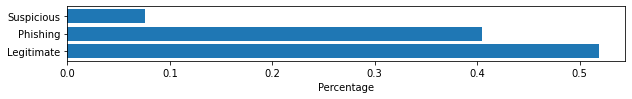

In [35]:
plt.figure(figsize = (10,1))
plt.barh(['Legitimate','Phishing','Suspicious'], 
target_ratio.Percentage)
plt.xlabel('Percentage')
plt.show()


In [36]:
X=data.drop(['Result','id'],axis=1)
y=data.Result

# Grid Search
Here are the parameters for GridSearchCV:
• estimator: model
• param_grid: dist or list of dictionaries Parameters to the 
estimator/model
• scoring: string,callable, list/tuple, dict or None, default: None
Evaluating metrics
• cv: int or callable Cross validation

In [37]:
params = {"criterion": ["gini", "entropy"], "n_estimators": [100, 150, 200, 300]}
rf_gsv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, cv=3, scoring='accuracy')
rf_gsv.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 150, 200, 300]},
             scoring='accuracy')

In [38]:
pd.DataFrame(rf_gsv.cv_results_).sort_values('rank_test_score')


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.199209,0.016181,0.017146,0.000096,gini,100,"{'criterion': 'gini', 'n_estimators': 100}",0.886918,0.889135,0.922395,0.899483,0.016227,1
5,0.285659,0.003388,0.024374,0.000333,entropy,150,"{'criterion': 'entropy', 'n_estimators': 150}",0.882483,0.886918,0.922395,0.897265,0.017861,2
3,0.564798,0.009205,0.048328,0.001722,gini,300,"{'criterion': 'gini', 'n_estimators': 300}",0.886918,0.884701,0.917960,0.896526,0.015183,3
6,0.383367,0.006046,0.035755,0.005588,entropy,200,"{'criterion': 'entropy', 'n_estimators': 200}",0.882483,0.889135,0.917960,0.896526,0.015397,3
7,0.734297,0.143502,0.068457,0.003554,entropy,300,"{'criterion': 'entropy', 'n_estimators': 300}",0.882483,0.882483,0.922395,0.895787,0.018814,5
2,0.400344,0.022576,0.036704,0.004271,gini,200,"{'criterion': 'gini', 'n_estimators': 200}",0.882483,0.884701,0.917960,0.895048,0.016227,6
4,0.197308,0.003958,0.018136,0.001873,entropy,100,"{'criterion': 'entropy', 'n_estimators': 100}",0.884701,0.884701,0.915743,0.895048,0.014633,6
1,0.281845,0.014639,0.028310,0.004356,gini,150,"{'criterion': 'gini', 'n_estimators': 150}",0.880266,0.882483,0.920177,0.894309,0.018314,8
